<a href="https://colab.research.google.com/github/tetianafesenko/Assignment_1_IRISvsMNIST/blob/main/All_data_IRIS_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Coding a k-NN Algorithm
In this assignment we will work with two different datasets:
1.  MNIST 🔢
2.  Iris Plant Dataset 🪴

**Part 1:** Go through all of the code for a simple implementation of the sklearn KNN model using the MNIST dataset. 


**Part 2:** Reimplement this code but with the [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html). *Hint:* This will involve making modifications to the *load data code block*  

**Part 3:** Provide answers to questions 4 & 5 in the Assignment. 







Import all of your required libraries. If you run into problems that it says *"ModuleNotFoundError: No module named 'sktime'"* you will need to add an additional block above your imports with the following command:


> !pip install *missing_module*




In [1]:
# import the necessary libraries and packages
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris


## Import and process your data to get ready to act as inputs to the KNN model




In [2]:
#Load in data as dataset #1
dataset_1 = datasets.load_iris()
dataset_name = 'Iris'

#######.    HINT    #############
# For Q5 you will have to manipulate the variable dataset_1 here
#Reassign (1) dataset_1.data and (2) dataset_1.feature_names

#look at the shape of your data, the number and name of classes
print('The shape of the {} dataset is {}'.format(dataset_name, dataset_1.data.shape))

#print('\nThis means we have {} {} x {} images'.format(dataset_1.images.shape[0], dataset_1.images.shape[1], dataset_1.images.shape[1]))

print('\nThere are {} classes in the {} dataset'.format(len(np.unique(dataset_1.target)), dataset_name))

print('\n The classes in the {} dataset are {}'.format(dataset_name, np.unique(dataset_1.target))) 



The shape of the Iris dataset is (150, 4)

There are 3 classes in the Iris dataset

 The classes in the Iris dataset are [0 1 2]


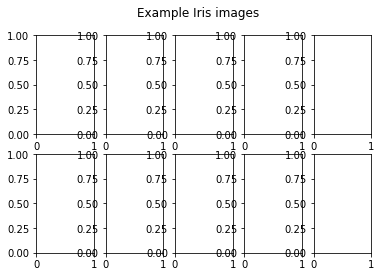

In [3]:
#######.    HINT    #############
# For Q5 you will have to comment this out because the data is tabular rather than image based

# Visualize a few  examples of what the data looks like
plt.gray()
plt.suptitle('Example {} images'.format(dataset_name))
for i in range(1,11):
  plt.subplot(2,5,i)
  #plt.imshow(dataset_1.images[i])

#### Split the data into train, test, and validation sets

In [4]:
# take the data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(dataset_1.data),
	dataset_1.target, test_size=0.25, random_state=42)

# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

# show the sizes of each data split
print("{} training data points: {}".format(dataset_name, len(trainLabels)))
print("{} validation data points: {}".format(dataset_name, len(valLabels)))
print("{} testing data points: {}".format(dataset_name, len(testLabels)))


Iris training data points: 100
Iris validation data points: 12
Iris testing data points: 38


## Find the optimal performance for k on the validation set
K is a *hyperparamter* of the KNN model, meaning it needs to be tuned or chosen by the ML practitioner. We do this by evaluating the model on a preliminary validation set

In [5]:
#Create an array of all of the k-values we would like to evaluate 
k_values = range(1,100)

#Create an empty array that will store the accuracy values for each value of k
acc_list = []

for k in k_values:
  #Initialize the KNN model 
  knn = KNeighborsClassifier(n_neighbors=k)

  #Fit the model using the training data
  knn.fit(trainData, trainLabels)

  #Predict labels for the validation set
  pred = knn.predict(valData)

  #Evaluate model accuracy and save to a list for later analysis
  acc_list.append(metrics.accuracy_score(pred, valLabels))


The best accuracy was 0.9166666666666666
The K values where the accuracy is highest are (array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 17, 18, 19, 20]),)


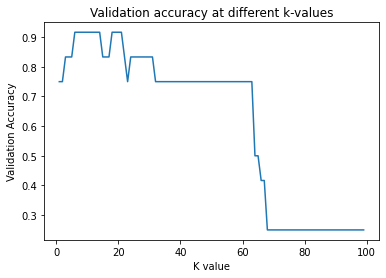

In [6]:
#Create a plot showing the relationship between the values of k and accuracy
plt.title('Validation accuracy at different k-values')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')

plt.plot(k_values, acc_list)

#Find the best value for K to be used for the test set 
print('The best accuracy was {}'.format(max(acc_list)))
idx = np.where(acc_list == np.max(acc_list))
print('The K values where the accuracy is highest are {}'.format(idx))


## Test the model with your selected hyperparameters 
After visual inspection I chose a k-value of 10. Although they are all equal having more points improves model robustness but I can see there is a steep decline in performance after 15.

In [ ]:
#Retrain the model with the selected k_value
#Initialize the KNN model 
k=10
knn = KNeighborsClassifier(n_neighbors=k)

#Fit the model using the training data
knn.fit(trainData, trainLabels)

#Predict labels for the test set
pred_test = knn.predict(testData)
test_acc = metrics.accuracy_score(pred_test, testLabels)
print('Final test accuracy is {} for {}'.format(test_acc, dataset_name))

Integrating in Python 

In [ ]:
# Section 3, Q6 -- Sample code gratiously provided by Maryam

import scipy 
#We know that Z = (X-Y)^2

#Define a function to write out function to calculate integral for E[Z]
def z_calc1(x,y):
    return pow((x-y),2)

#Define a function to write out function to calculate integral for first term of Var = (E[Z])^2
def z_calc2(x,y):
    return pow(pow((x-y),2),2)

#Calculate the E[Z]
expected_z = scipy.integrate.dblquad(z_calc1,0, 1,0,1)
print(expected_z[0])

#Calculate the Variance which is Var[Z] = (E[Z^2]) - (E[Z]) ^2
var_z = scipy.integrate.dblquad(z_calc2,0, 1,0,1)[0] - pow(expected_z[0],2)
print(var_z)


0.16666666666666666
0.0388888888888889
